In [1]:
import pandas as pd
import numpy as np
import datetime
from sklearn.impute import KNNImputer

In [2]:
df = pd.read_csv('scaler_clustering.csv')

In [3]:
df.shape

(205843, 7)

In [4]:
df.isnull().sum()

Unnamed: 0              0
company_hash           44
email_hash              0
orgyear                86
ctc                     0
job_position        52562
ctc_updated_year        0
dtype: int64

In [5]:
df.nunique()

Unnamed: 0          205843
company_hash         37299
email_hash          153443
orgyear                 77
ctc                   3360
job_position          1017
ctc_updated_year         7
dtype: int64

In [6]:
df.head()

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205843 entries, 0 to 205842
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        205843 non-null  int64  
 1   company_hash      205799 non-null  object 
 2   email_hash        205843 non-null  object 
 3   orgyear           205757 non-null  float64
 4   ctc               205843 non-null  int64  
 5   job_position      153281 non-null  object 
 6   ctc_updated_year  205843 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 11.0+ MB


In [8]:
df.describe()

,Unnamed: 0,orgyear,ctc,ctc_updated_year
count,205843.000000,205757.000000,2.058430e+05,205843.000000
mean,103273.941786,2014.882750,2.271685e+06,2019.628231
std,59741.306484,63.571115,1.180091e+07,1.325104
min,0.000000,0.000000,2.000000e+00,2015.000000
25%,51518.500000,2013.000000,5.300000e+05,2019.000000
50%,103151.000000,2016.000000,9.500000e+05,2020.000000
75%,154992.500000,2018.000000,1.700000e+06,2021.000000
max,206922.000000,20165.000000,1.000150e+09,2021.000000


In [9]:
df.drop(columns=['Unnamed: 0'],axis = 1,inplace = True)

In [10]:
df.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0


In [11]:
df.nunique().reset_index()

,index,0
0,company_hash,37299
1,email_hash,153443
2,orgyear,77
3,ctc,3360
4,job_position,1017
5,ctc_updated_year,7


In [12]:
pd.DataFrame(df.ctc.unique(),columns=['ctc']).sort_values(by=['ctc'])

,ctc
2627,2
2417,6
2341,14
3165,15
3143,16
...,...
315,199990000
61,200000000
361,250000000
2413,255555555


In [13]:
df[df.duplicated()]

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
97138,wtqtzwt xzw,bb8e4b09544daf1bfc8c7bb9a9ae1fee35490cf3f321b8...,2014.0,1000000,FullStack Engineer,2019.0
98085,2020,6ad3e6ab27462c2c7428fa5d51405933335341d4d969b5...,2020.0,720000,NaN,2019.0
102600,voxvz uvxzno,c7fac937a34f7ae432ff1d77466eb7ea6cf25dfd5ebcca...,2020.0,1280000,NaN,2019.0
109324,wgbwvon mhoxztoo,0442a51ef5080d7d40721c007131a1d5bdeabae2c1b153...,2016.0,700000,NaN,2019.0
111354,uyxrxuo xzzgcvnxgz wvbuho,704d69965035d1c341b06fc5d83bf1b714f1625c0cf271...,2017.0,850000,iOS Engineer,2019.0
111521,aqggb ntwyzgrgsj,df81dac132d66a42a0c71a4799e1040731738e542c81ff...,2017.0,1270000,FullStack Engineer,2019.0
115241,rgfto wgbuvzxto xzw,ea363e930dabe0fbb63438e07775af3cb3b32639947c47...,2017.0,1100000,Backend Engineer,2019.0
117246,xatbxv,f451ceee50b1bfa3dc749c6aa8634ab3851a4ab961b003...,2019.0,640000,NaN,2019.0
117549,exzdtqv,e7df851527dd6f8ec95d5e13d9fb2a7255380245b808e3...,2020.0,1500000,NaN,2020.0
120371,avnvbtnxwv ogrhnxgzo uqxcvnt rxbxnta,15d7dd6801fb7cb980e77c420dd9bef5773e7ef57f510c...,2016.0,1300000,Backend Engineer,2020.0


In [14]:
df = df.drop_duplicates(keep='first')

In [15]:
df.duplicated().sum()

0

In [16]:
df.isnull().sum()

company_hash           44
email_hash              0
orgyear                86
ctc                     0
job_position        52547
ctc_updated_year        0
dtype: int64

<AxesSubplot:>

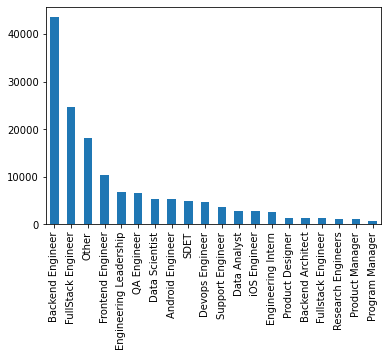

In [17]:
df["job_position"].value_counts()[:20,].sort_values(ascending=False).plot(kind="bar")

<AxesSubplot:>

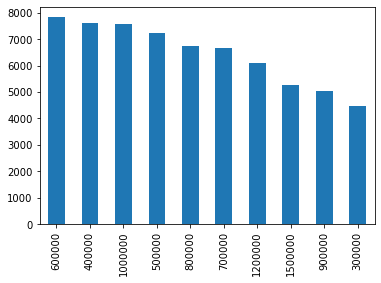

In [18]:
df["ctc"].value_counts()[:10,].sort_values(ascending=False).plot(kind="bar")

In [123]:
import seaborn as sns

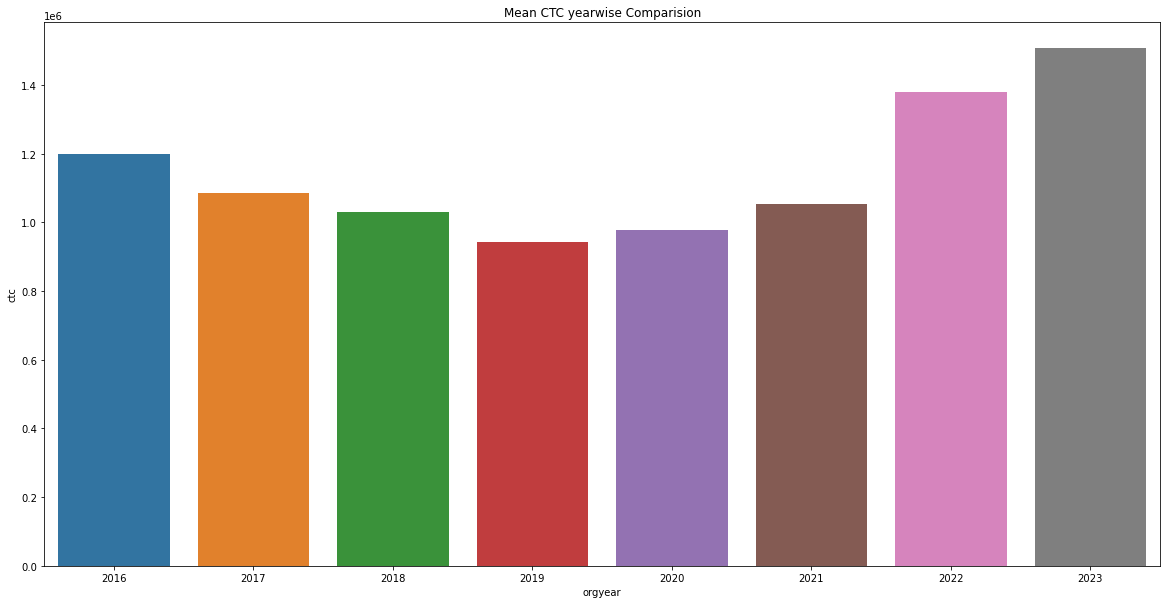

In [124]:
tmp = df[df['orgyear'] >= 2016]
tmp = tmp.groupby(['orgyear']).mean()['ctc'].reset_index().sort_values('ctc',ascending=False).head(50)
plt.figure(figsize=(20,10))
sns.barplot(data=tmp,y='ctc',x='orgyear').set(title="Mean CTC yearwise Comparision")
plt.show()


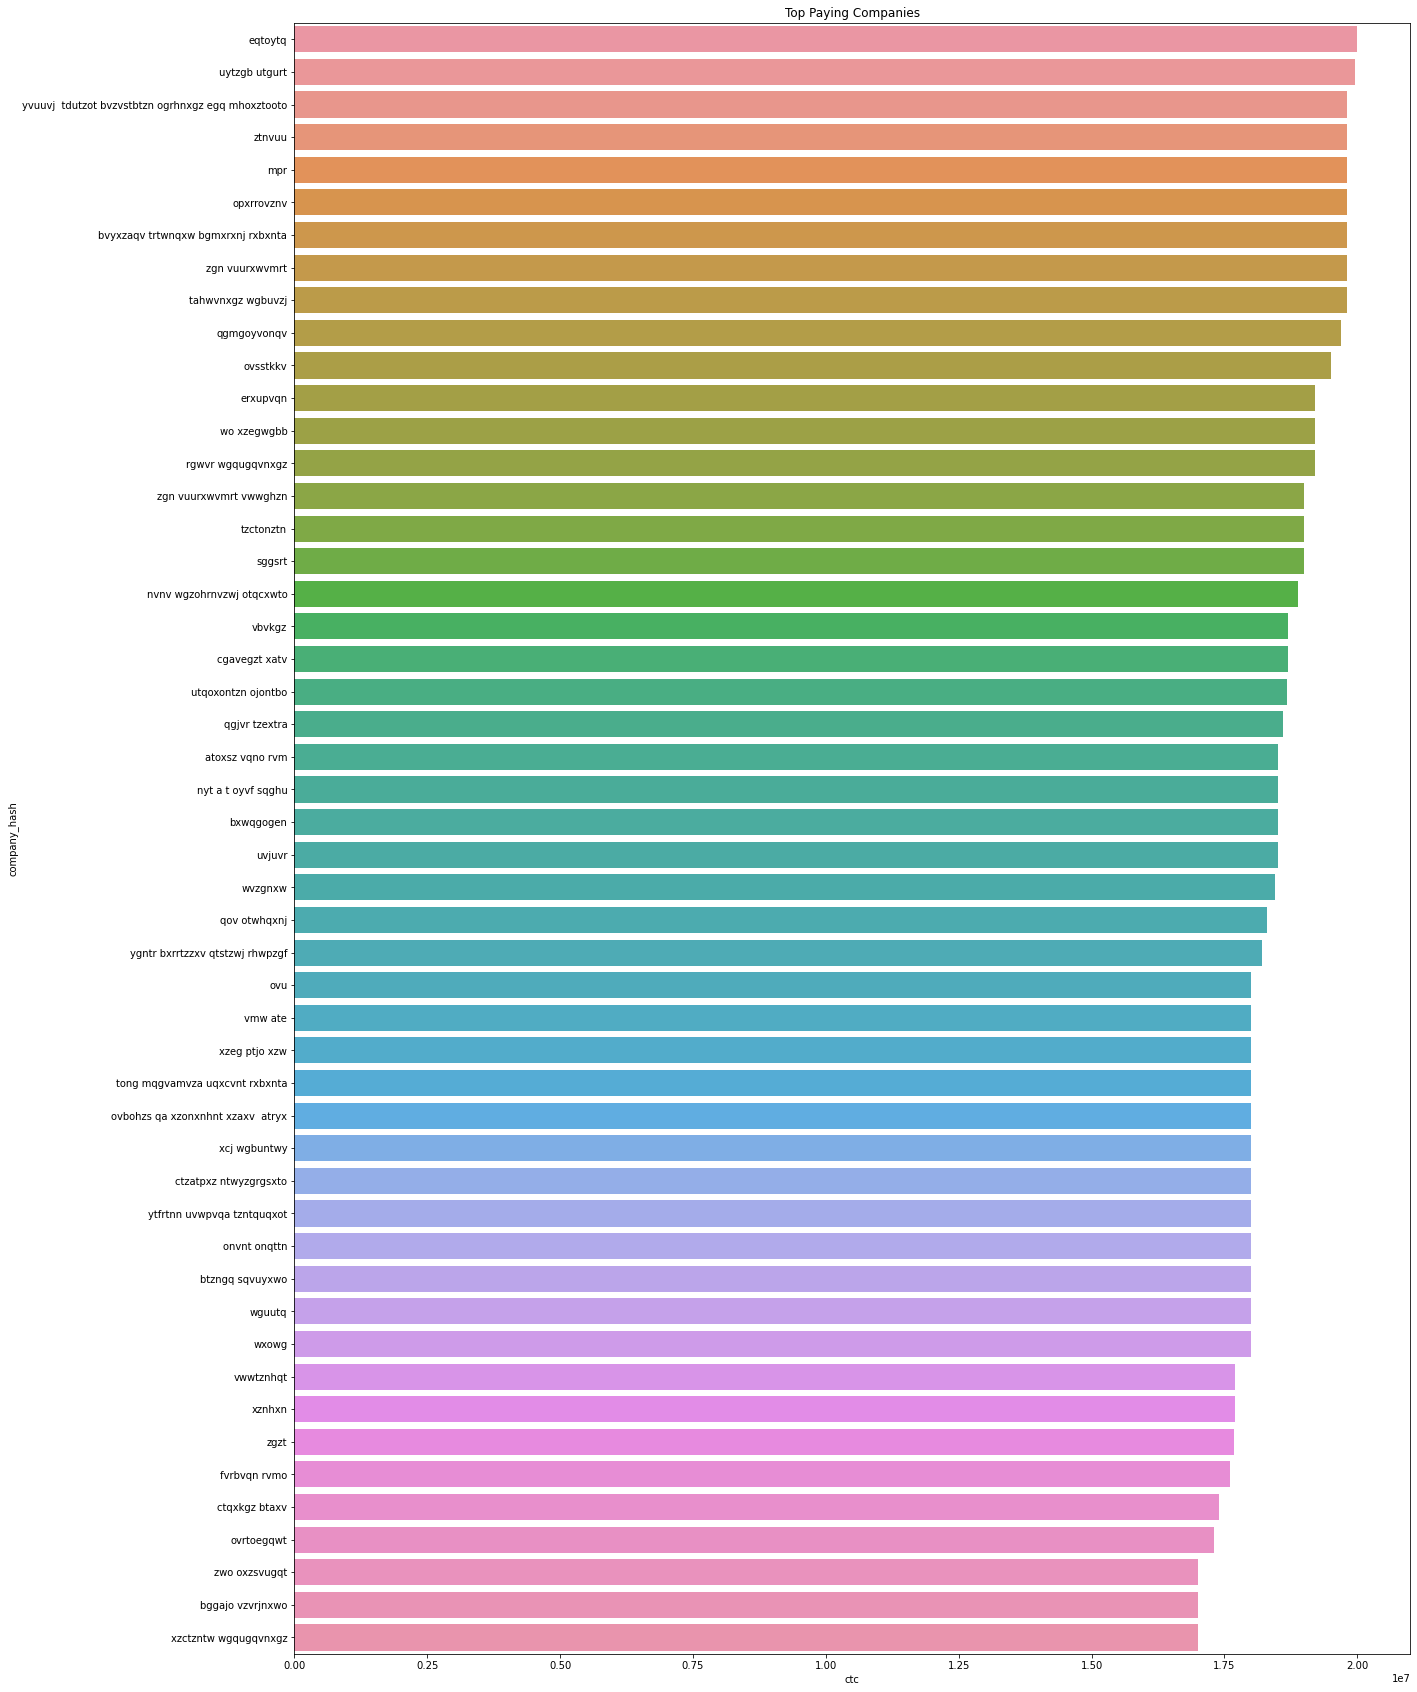

In [125]:
tmp = df.groupby(['company_hash']).max()['ctc'].reset_index().sort_values('ctc',ascending=False).head(50)
plt.figure(figsize=(20,30))
sns.barplot(data=tmp,x='ctc',y='company_hash').set(title="Top Paying Companies")
plt.show()

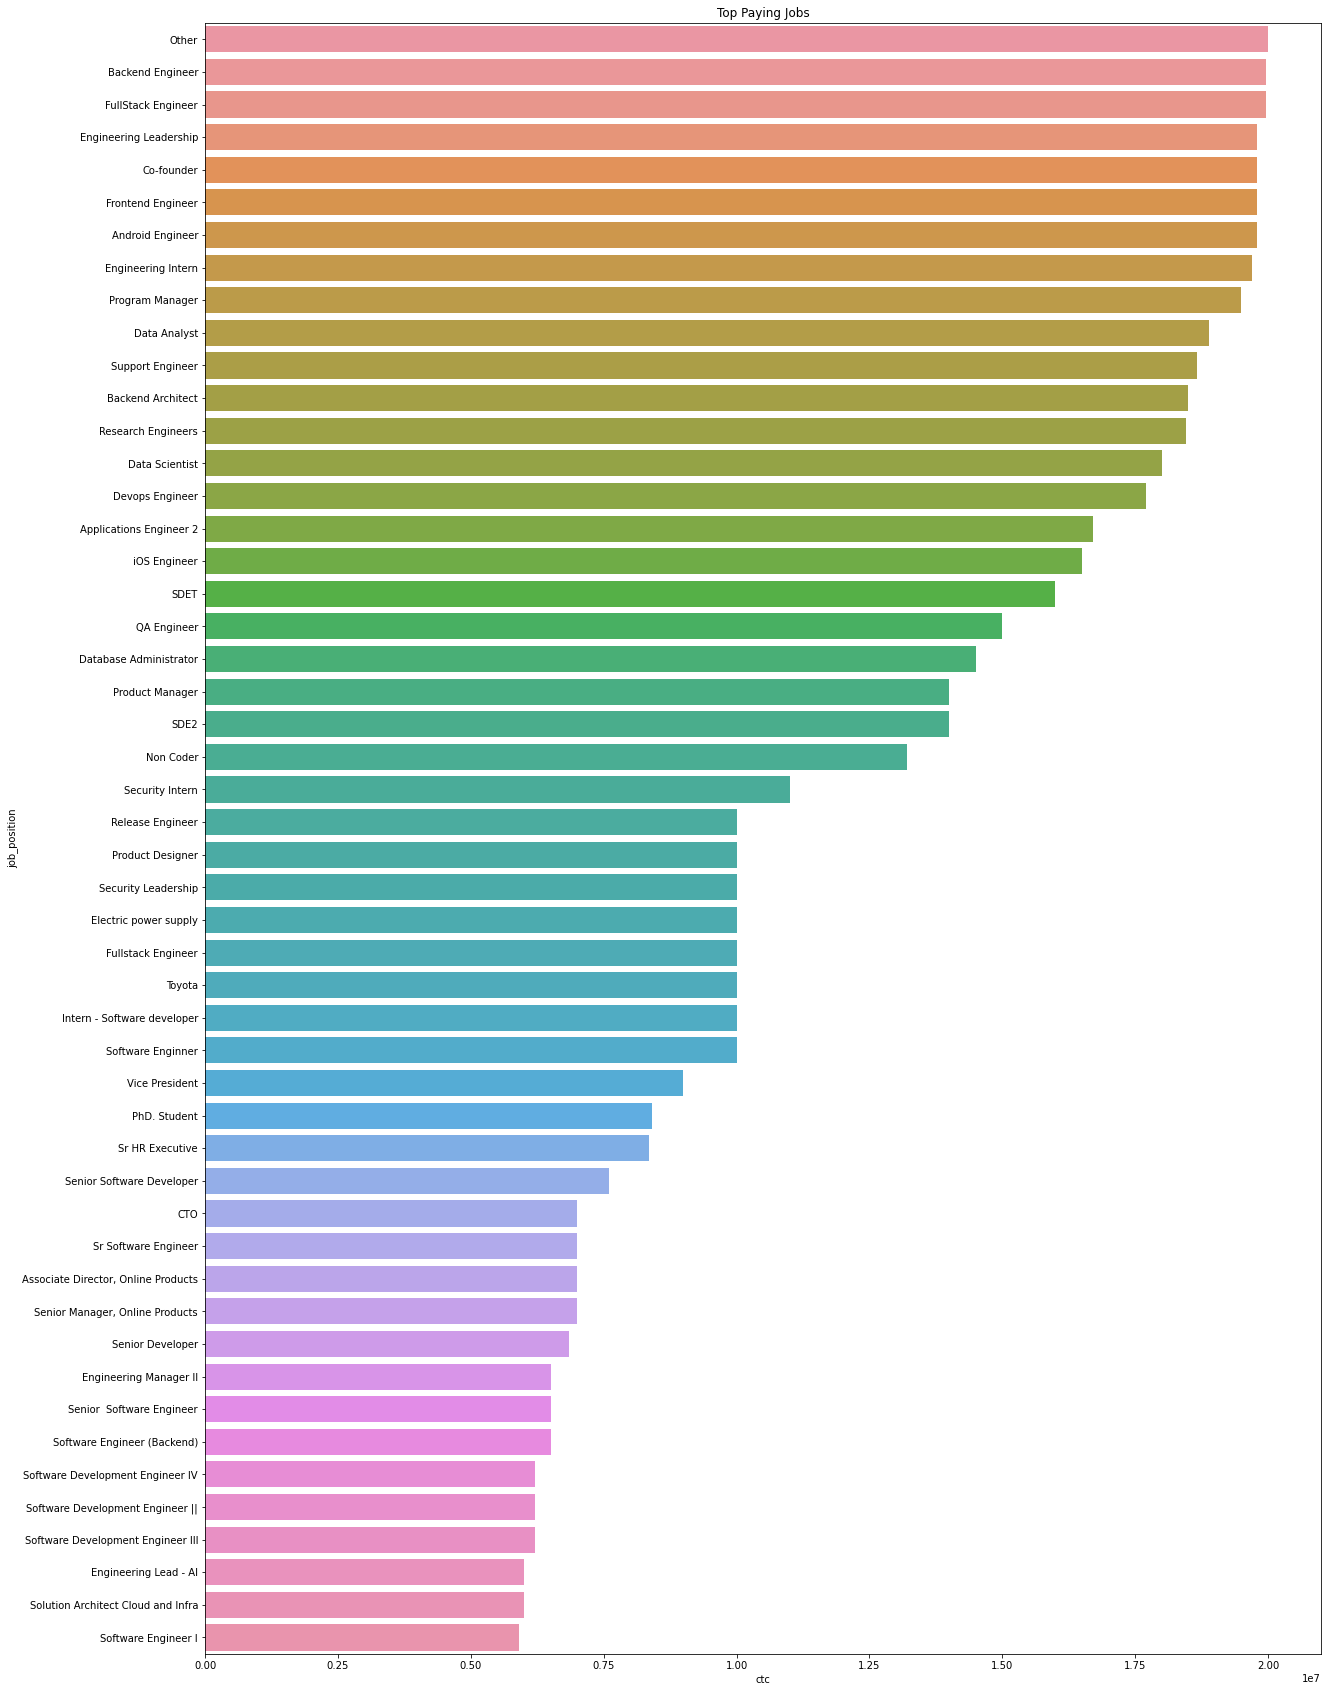

In [126]:
tmp = df.groupby(['job_position']).max()['ctc'].reset_index().sort_values('ctc',ascending=False).head(50)
plt.figure(figsize=(20,30))
sns.barplot(data=tmp,x='ctc',y='job_position').set(title="Top Paying Jobs")
plt.show()


In [19]:
df["orgyear"].describe()

count    205724.000000
mean       2014.882284
std          63.576199
min           0.000000
25%        2013.000000
50%        2016.000000
75%        2018.000000
max       20165.000000
Name: orgyear, dtype: float64

In [20]:
df.shape

(205810, 6)

In [22]:
df = df[(df['orgyear']>1900) & (df['orgyear']<=2023)]

In [23]:
df.shape

(205594, 6)

In [24]:
df["orgyear"].describe()

count    205594.000000
mean       2015.114230
std           4.232484
min        1970.000000
25%        2013.000000
50%        2016.000000
75%        2018.000000
max        2023.000000
Name: orgyear, dtype: float64

In [25]:
df.isnull().sum()

company_hash           44
email_hash              0
orgyear                 0
ctc                     0
job_position        52483
ctc_updated_year        0
dtype: int64

In [26]:
df["ctc"].describe()

count    2.055940e+05
mean     2.267724e+06
std      1.178357e+07
min      2.000000e+00
25%      5.300000e+05
50%      9.500000e+05
75%      1.700000e+06
max      1.000150e+09
Name: ctc, dtype: float64

In [27]:
df[(df['ctc']>20000000)].value_counts().reset_index()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,0
0,247 xrvm,a2f5b06ce7047c4b6c009d225b3cdf7ca9e4fbd7dd7b9a...,2013.0,100000000,SDET,2020.0,1
1,vbvkgz,a24cb4320f2cc9b75880d1ce3e6178fa643206f85e080f...,2020.0,100000000,Product Designer,2021.0,1
2,vbvkgz,fac2d01e4a347175bc91492927b5debbe2926b7b42e7f2...,2020.0,100000000,Support Engineer,2020.0,1
3,vbvkgz,e229403209e6c5c8ade0f6905474cecba91b2f223345ba...,2018.0,100000000,Other,2021.0,1
4,vbvkgz,d4a907191bd1b53c6f4b69a515be05c3d900650b823c78...,2010.0,100000000,Backend Engineer,2020.0,1
...,...,...,...,...,...,...,...
1366,nvnv wgzohrnvzwj otqcxwto,82fbacc015757ee74efe763c3623dc751812af48c741ff...,2015.0,200000000,Data Analyst,2020.0,1
1367,nvnv wgzohrnvzwj otqcxwto,8212e1a25405440bf29178cd87f89bb1ad33108e3cbc04...,2020.0,100000000,Data Analyst,2020.0,1
1368,nvnv wgzohrnvzwj otqcxwto,7794dcb7f5649076573e653610bd3f652ca5aa9d5b1671...,2021.0,100000000,Other,2020.0,1
1369,nvnv wgzohrnvzwj otqcxwto,71816854137816ffdc94fc2b283803af8e38979e2d0992...,2014.0,200000000,Backend Engineer,2020.0,1


In [28]:
df.shape

(205594, 6)

In [29]:
df=df.loc[(df['ctc']>50000) & (df['ctc']<20000000)]

In [30]:
df.shape

(201300, 6)

In [31]:
df.isnull().sum()/len(df)*100


company_hash         0.020864
email_hash           0.000000
orgyear              0.000000
ctc                  0.000000
job_position        25.646796
ctc_updated_year     0.000000
dtype: float64

In [32]:
df.isnull().sum()

company_hash           42
email_hash              0
orgyear                 0
ctc                     0
job_position        51627
ctc_updated_year        0
dtype: int64

In [33]:
# x.rename({0:'orgyear_impute'},axis=1,inplace = True)

# df = pd.concat([df, x], axis=1, join='inner')

# df.isnull().sum()

# df.head()

# df['orgyear_impute'].min(), df['orgyear_impute'].max()

In [34]:
current_year = datetime.datetime.now().year #get current year

df['Current Year'] = datetime.datetime.now().year
#   # substract to get the year delta

In [35]:
df['orgyear']=df['orgyear'].astype('int64')

In [36]:
df["experience"] = df['Current Year'] - df['orgyear']

In [37]:
df.groupby("job_position")["ctc"].describe()

,count,mean,std,min,25%,50%,75%,max
job_position,,,,,,,,
SDE 2,1.0,1200000.0,NaN,1200000.0,1200000.0,1200000.0,1200000.0,1200000.0
.,1.0,700000.0,NaN,700000.0,700000.0,700000.0,700000.0,700000.0
..,1.0,600000.0,NaN,600000.0,600000.0,600000.0,600000.0,600000.0
.7,1.0,470000.0,NaN,470000.0,470000.0,470000.0,470000.0,470000.0
7,1.0,420000.0,NaN,420000.0,420000.0,420000.0,420000.0,420000.0
...,...,...,...,...,...,...,...,...
student,2.0,1715000.0,968736.290226,1030000.0,1372500.0,1715000.0,2057500.0,2400000.0
support escalation engineer,1.0,2000000.0,NaN,2000000.0,2000000.0,2000000.0,2000000.0,2000000.0
system engineer,1.0,500000.0,NaN,500000.0,500000.0,500000.0,500000.0,500000.0


In [38]:
df.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,Current Year,experience
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016,1100000,Other,2020.0,2023,7
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018,449999,FullStack Engineer,2019.0,2023,5
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015,2000000,Backend Engineer,2020.0,2023,8
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017,700000,Backend Engineer,2019.0,2023,6
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017,1400000,FullStack Engineer,2019.0,2023,6


# Duplicates

In [39]:
# dup_email = df['email_hash'].value_counts().reset_index()

# dup_email[dup_email['email_hash']>2].iloc[:1]

# df.groupby(df['email_hash'])

# df.groupby('email_hash').apply(lambda x : x.sort_values(by = 'job_position', ascending = False).head(2).reset_index(drop = True))

In [40]:
df.experience.min(),df.experience.max()

(0, 53)

In [41]:
df.shape

(201300, 8)

In [42]:
#Assuming that people who has more than 20 years of experience will be having CTC greater than 10LPA and removing the records
df = df[~((df['experience']>20) &(df['ctc']<1000000))]

In [43]:
df.shape

(200647, 8)

In [44]:
email_dup = df.groupby(df['email_hash']).count()['ctc'].reset_index()

In [45]:
email_dup[email_dup['ctc']>1].sort_values(by = 'ctc', ascending = False)

,email_hash,ctc
109369,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,10
24397,298528ce3160cc761e4dc37a07337ee2e0589df251d736...,9
60776,6842660273f70e9aa239026ba33bfe82275d6ab0d20124...,9
36407,3e5e49daa5527a6d5a33599b238bf9bf31e85b9efa9a94...,9
121994,d15041f58bb01c8ee29f72e33b136e26bc32f3169a40b5...,8
...,...,...
55473,5f24d4cde7984dbab5a2d56c60b60de4ca8dc7c508b288...,2
55456,5f1dbd52a4c170334d7b9ded2a76280f604c1548828470...,2
55445,5f1ac892681e388456df5f82576efc9b0ea759f3542570...,2
55443,5f1a0dd38dc5b8d2dbd855ee80338174f1de81aadd7dae...,2


In [46]:
df.columns

Index(['company_hash', 'email_hash', 'orgyear', 'ctc', 'job_position',
       'ctc_updated_year', 'Current Year', 'experience'],
      dtype='object')

In [47]:
df['job_position'] = df['job_position'].fillna('Other') # filled null values with 'Other'
df['job_position'].isna().sum()

0

In [48]:
# removing duplicates
df.duplicated().sum()

4261

In [49]:
df.drop_duplicates(keep='first',inplace=True)

In [50]:
df.duplicated().sum()

0

In [51]:
email_dup = df.groupby(df['email_hash']).count()['ctc'].reset_index()

In [52]:
email_dup[email_dup['ctc']>1].sort_values(by = 'ctc', ascending = False)

,email_hash,ctc
36407,3e5e49daa5527a6d5a33599b238bf9bf31e85b9efa9a94...,9
60776,6842660273f70e9aa239026ba33bfe82275d6ab0d20124...,9
112412,c0eb129061675da412b0deb15871dd06ef0d7cd86eb5f7...,8
105449,b4d5afa09bec8689017d8b29701b80d664ca37b83cb883...,8
41984,4818edfd67ed8563dde5d083306485d91d19f4f1c95d19...,8
...,...,...
55425,5f10a84435767459749b0842b8d7de0b8bd66d5b9f0b69...,2
55424,5f10a445e04c184991a62ff9c7a144742df1ac21127065...,2
55419,5f0e7d02a3af66bc35efd0cf9dad1dc67ad31794e7e03a...,2
55418,5f0da43d019faea71763de3cae69f9172997c5f6231b4d...,2


In [53]:
df.columns

Index(['company_hash', 'email_hash', 'orgyear', 'ctc', 'job_position',
       'ctc_updated_year', 'Current Year', 'experience'],
      dtype='object')

In [54]:
df.shape

(196386, 8)

In [55]:
df.sort_values(by='ctc_updated_year',ascending=True,inplace=True)

In [56]:
df_grouped = df.groupby(['email_hash']).aggregate(orgyear =('orgyear', 'min'),
                                      ctc = ('ctc','max'),
                                      ctc_updated_year = ('ctc_updated_year','max'),
                                        experience = ('experience','max'),
                                        job_position = ('job_position','last'),
                                        company_hash=('company_hash','last')).reset_index()

In [57]:
email_dup = df_grouped.groupby(df_grouped['email_hash']).count()['ctc'].reset_index()

In [58]:
email_dup[email_dup['ctc']>1].sort_values(by = 'ctc', ascending = False)

,email_hash,ctc


In [59]:
company_details = df.groupby('company_hash').aggregate(company_mean=('ctc','mean'),
                                     company_median=('ctc','median'),
                                    company_max=('ctc','max'),
                                    company_min=('ctc','min'),
                                    company_count=('ctc','count')).reset_index()

<AxesSubplot:>

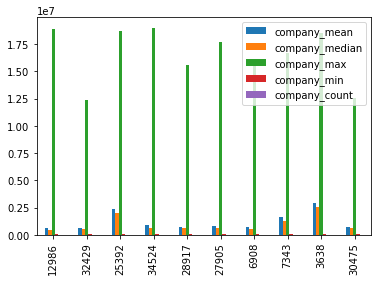

In [60]:
company_details.sort_values(by='company_count',ascending=False).head(10).plot(kind='bar')

In [61]:
company_details[company_details['company_count']>=100].round(2)

,company_hash,company_mean,company_median,company_max,company_min,company_count
312,adw ntwyzgrgsj,920565.97,600000.0,8000000,56000,288
323,adw ntwyzgrgsxto,940614.79,670000.0,12000000,100000,135
562,amo mvzp,1493992.74,1200000.0,10000000,75000,193
839,athnowyt mvzp,1711856.51,1500000.0,6000000,70000,230
911,atrgxnnt,1084197.35,900000.0,10000000,60000,646
...,...,...,...,...,...,...
35152,ztnvuu,2416521.18,2000000.0,19800000,105000,165
35472,zvsvqqg,1169893.58,1000000.0,11400000,68000,780
35494,zvz,1263444.46,953999.0,12500000,51000,1619
35520,zwq wgqugqvnxgz,1159296.08,800000.0,5500000,100000,179


In [62]:
# Job_position

In [63]:
job_position_details = df.groupby('job_position').aggregate(job_position_mean=('ctc','mean'),
                                     job_position_median=('ctc','median'),
                                    job_position_max=('ctc','max'),
                                    job_position_min=('ctc','min'),
                                    job_position_count=('ctc','count')).reset_index()

In [64]:
job_position_details.sort_values(by='job_position_count',ascending=False)

,job_position,job_position_mean,job_position_median,job_position_max,job_position_min,job_position_count
441,Other,1.179907e+06,800000.0,19998000,51000,64463
137,Backend Engineer,1.547486e+06,1200000.0,19959000,51000,42599
281,FullStack Engineer,1.287284e+06,950000.0,19959000,51000,24036
277,Frontend Engineer,1.149396e+06,900000.0,19800000,52000,10194
246,Engineering Leadership,2.836434e+06,2600000.0,19800000,52000,6656
...,...,...,...,...,...,...
366,MTS-3,1.100000e+06,1100000.0,1100000,1100000,1
368,Machine Learning Data Associate,3.600000e+05,360000.0,360000,360000,1
369,Machine Learning Developer,2.500000e+05,250000.0,250000,250000,1
371,Machine Learning Engineer Intern,7.000000e+05,700000.0,700000,700000,1


In [65]:
job_position_details[job_position_details['job_position_count']<=5]

,job_position,job_position_mean,job_position_median,job_position_max,job_position_min,job_position_count
0,SDE 2,1200000.0,1200000.0,1200000,1200000,1
1,.,700000.0,700000.0,700000,700000,1
2,..,600000.0,600000.0,600000,600000,1
3,.7,470000.0,470000.0,470000,470000,1
4,7,420000.0,420000.0,420000,420000,1
...,...,...,...,...,...,...
972,student,1715000.0,1715000.0,2400000,1030000,2
973,support escalation engineer,2000000.0,2000000.0,2000000,2000000,1
974,system engineer,500000.0,500000.0,500000,500000,1
975,system software engineer,610000.0,610000.0,610000,610000,1


In [66]:
yoe_details = df.groupby('experience').aggregate(yoe_mean=('ctc','mean'),
                                     yoe_median=('ctc','median'),
                                    yoe_max=('ctc','max'),
                                    yoe_min=('ctc','min'),
                                    yoe_count=('ctc','count')).reset_index()

In [67]:
yoe_details.head(10)

,experience,yoe_mean,yoe_median,yoe_max,yoe_min,yoe_count
0,0,1.508037e+06,720000.0,19800000,80000,214
1,1,1.381448e+06,860000.0,19000000,60000,834
2,2,1.054513e+06,700000.0,19800000,58000,3378
3,3,9.787543e+05,700000.0,18500000,51000,12670
4,4,9.434998e+05,700000.0,18500000,55000,22373
5,5,1.030918e+06,714000.0,19800000,51000,24045
6,6,1.086802e+06,800000.0,19998000,51000,22151
7,7,1.198410e+06,869999.0,19500000,51000,22102
8,8,1.279824e+06,960000.0,19800000,52000,19839
9,9,1.383307e+06,1036999.0,19800000,52000,16121


<AxesSubplot:>

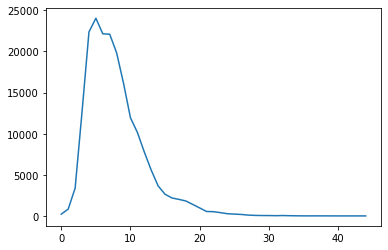

In [68]:
yoe_details.sort_values(by='experience')['yoe_count'].plot()

In [69]:
company_details=company_details.round(2)
job_position_details=job_position_details.round(2)
yoe_details=yoe_details.round(2)

In [70]:
df = df.merge(right=company_details[['company_hash','company_mean']], on='company_hash',how='inner')

In [71]:
df = df.merge(right=job_position_details[['job_position','job_position_mean']], on='job_position',how='inner')

In [72]:
df = df.merge(right=yoe_details[['experience','yoe_mean']], on='experience',how='inner')

In [73]:
df.reset_index(inplace=True)

In [74]:
df.shape

(196345, 12)

In [75]:
def company_relative_change(df):
    return (df['ctc'] - df['company_mean']) / df['company_mean']

def job_position_relative_change(df):
    return (df['ctc'] - df['job_position_mean']) / df['job_position_mean']

def yoe_relative_change(df):
    return (df['ctc'] - df['yoe_mean']) / df['yoe_mean']

In [76]:
company_rel = pd.DataFrame(company_relative_change(df)).reset_index().rename(columns={'0':'company_rel'})
job_position_rel = pd.DataFrame(job_position_relative_change(df)).reset_index().rename(columns={'0':'job_position_rel'})
yoe_rel = pd.DataFrame(yoe_relative_change(df)).reset_index().rename(columns={'0':'yoe_rel'})

In [77]:
company_rel.head()

,index,0
0,0,0.034625
1,1,0.114212
2,2,0.273385
3,3,1.586563
4,4,-0.840333


In [78]:
df = df.merge(right=company_rel, on='index',how='inner')
df = df.merge(right=job_position_rel, on='index',how='inner')
df = df.merge(right=yoe_rel, on='index',how='inner')

In [79]:
df.head()

,index,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,Current Year,experience,company_mean,job_position_mean,yoe_mean,0_x,0_y,0
0,0,bxzanxwprt,945a580970d17b4b9bea9945f72709bb47a030bc70d490...,2015,2600000,Backend Engineer,2015.0,2023,8,2512987.65,1547485.82,1279824.01,0.034625,0.680145,1.031529
1,1,bxzanxwprt,8e941fac74044e63964754e63d7d21cfa986267f89e4f7...,2015,2800000,Backend Engineer,2019.0,2023,8,2512987.65,1547485.82,1279824.01,0.114212,0.809387,1.187801
2,2,bxzanxwprt,5913d933b27bd607936925ff67ad94e1c1b83ffc9f5191...,2015,3200000,Backend Engineer,2019.0,2023,8,2512987.65,1547485.82,1279824.01,0.273385,1.067870,1.500344
3,3,bxzanxwprt,5bd4f708f6ab38c3d00de65b88677c8789b69255e40c07...,2015,6500000,Backend Engineer,2020.0,2023,8,2512987.65,1547485.82,1279824.01,1.586563,3.200362,4.078823
4,4,jvygg xzw,63a28c8f24f178b07c8ad560025a9305b5b978b8f38b7c...,2015,135000,Backend Engineer,2017.0,2023,8,845511.63,1547485.82,1279824.01,-0.840333,-0.912762,-0.894517


In [80]:
df.rename(columns={'0_x':'company_rel','0_y':'job_position_rel',0:'yoe_rel'},inplace=True)

In [81]:
df.head()

,index,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,Current Year,experience,company_mean,job_position_mean,yoe_mean,company_rel,job_position_rel,yoe_rel
0,0,bxzanxwprt,945a580970d17b4b9bea9945f72709bb47a030bc70d490...,2015,2600000,Backend Engineer,2015.0,2023,8,2512987.65,1547485.82,1279824.01,0.034625,0.680145,1.031529
1,1,bxzanxwprt,8e941fac74044e63964754e63d7d21cfa986267f89e4f7...,2015,2800000,Backend Engineer,2019.0,2023,8,2512987.65,1547485.82,1279824.01,0.114212,0.809387,1.187801
2,2,bxzanxwprt,5913d933b27bd607936925ff67ad94e1c1b83ffc9f5191...,2015,3200000,Backend Engineer,2019.0,2023,8,2512987.65,1547485.82,1279824.01,0.273385,1.067870,1.500344
3,3,bxzanxwprt,5bd4f708f6ab38c3d00de65b88677c8789b69255e40c07...,2015,6500000,Backend Engineer,2020.0,2023,8,2512987.65,1547485.82,1279824.01,1.586563,3.200362,4.078823
4,4,jvygg xzw,63a28c8f24f178b07c8ad560025a9305b5b978b8f38b7c...,2015,135000,Backend Engineer,2017.0,2023,8,845511.63,1547485.82,1279824.01,-0.840333,-0.912762,-0.894517


In [82]:
col = ['company_rel','job_position_rel','yoe_rel']
for i in col:
    conditions = [df[i] >= 0.2, (df[i] > -0.2) & (df[i] <= 0.2), df[i] < -0.2]
    choices = [1, 2, 3]
    df[i + '_class'] = np.select(conditions, choices, default='null')

In [83]:
df.head()

,index,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,Current Year,experience,company_mean,job_position_mean,yoe_mean,company_rel,job_position_rel,yoe_rel,company_rel_class,job_position_rel_class,yoe_rel_class
0,0,bxzanxwprt,945a580970d17b4b9bea9945f72709bb47a030bc70d490...,2015,2600000,Backend Engineer,2015.0,2023,8,2512987.65,1547485.82,1279824.01,0.034625,0.680145,1.031529,2,1,1
1,1,bxzanxwprt,8e941fac74044e63964754e63d7d21cfa986267f89e4f7...,2015,2800000,Backend Engineer,2019.0,2023,8,2512987.65,1547485.82,1279824.01,0.114212,0.809387,1.187801,2,1,1
2,2,bxzanxwprt,5913d933b27bd607936925ff67ad94e1c1b83ffc9f5191...,2015,3200000,Backend Engineer,2019.0,2023,8,2512987.65,1547485.82,1279824.01,0.273385,1.067870,1.500344,1,1,1
3,3,bxzanxwprt,5bd4f708f6ab38c3d00de65b88677c8789b69255e40c07...,2015,6500000,Backend Engineer,2020.0,2023,8,2512987.65,1547485.82,1279824.01,1.586563,3.200362,4.078823,1,1,1
4,4,jvygg xzw,63a28c8f24f178b07c8ad560025a9305b5b978b8f38b7c...,2015,135000,Backend Engineer,2017.0,2023,8,845511.63,1547485.82,1279824.01,-0.840333,-0.912762,-0.894517,3,3,3


In [84]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit_transform(df['job_position'])

array([137, 137, 137, ..., 246, 246, 246])

In [85]:
df[df['company_rel_class']=='1'].sort_values(by='ctc',ascending=False).head(10)

,index,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,Current Year,experience,company_mean,job_position_mean,yoe_mean,company_rel,job_position_rel,yoe_rel,company_rel_class,job_position_rel_class,yoe_rel_class
122804,122804,eqtoytq,db6866f146f012adb03831a251f892277cf076938cc1fc...,2017,19998000,Other,2019.0,2023,6,1083668.45,1179907.25,1086802.36,17.453984,15.948790,17.400770,1,1,1
119191,119191,uytzgb utgurt,bdedd1d96b39018c1ae020c90ae326b6ad4e160c2ab44a...,2017,19959000,FullStack Engineer,2020.0,2023,6,1975767.12,1287283.79,1086802.36,9.101899,14.504740,17.364885,1,1,1
114869,114869,uytzgb utgurt,bdedd1d96b39018c1ae020c90ae326b6ad4e160c2ab44a...,2017,19959000,Backend Engineer,2020.0,2023,6,1975767.12,1547485.82,1086802.36,9.101899,11.897695,17.364885,1,1,1
191485,191485,zgn vuurxwvmrt,e5ef043e885543843a2ffc11e18ba1662194512592b442...,2021,19800000,Other,2019.0,2023,2,1219975.33,1179907.25,1054513.02,15.229836,15.780980,17.776440,1,1,1
106940,106940,yvuuvj tdutzot bvzvstbtzn ogrhnxgz egq mhoxzt...,83fd708a1cdbc3b7f2cd28289e9d37ce6009bb9bd87621...,2018,19800000,Frontend Engineer,2020.0,2023,5,1827428.57,1149396.13,1030918.12,9.834897,16.226437,18.206181,1,1,1
18074,18074,bvyxzaqv trtwnqxw bgmxrxnj rxbxnta,a60507e926b9532ac5502d3821355e0c0861b4f97c6f9b...,2015,19800000,Android Engineer,2020.0,2023,8,5725000.00,1175568.12,1279824.01,2.458515,15.842920,14.470877,1,1,1
193729,193729,tahwvnxgz wgbuvzj,ee4e1a59a6613a15c0e16866c32f5af4c65e46a38d23e4...,2023,19800000,Engineering Leadership,2020.0,2023,0,2763333.33,2836434.20,1508037.38,6.165259,5.980596,12.129648,1,1,1
196219,196219,ztnvuu,0439e2628e7ba75f1a2cca142ec8ca9a7f0fdc042b92dc...,1989,19800000,FullStack Engineer,2019.0,2023,34,2416521.18,1287283.79,3810714.29,7.193597,14.381224,4.195876,1,1,1
25575,25575,ovsstkkv,61a2723ab9dbce9ef7bb18bf6db751b103b5b6bfca2f86...,2016,19500000,Program Manager,2021.0,2023,7,1145899.96,2456345.16,1198410.35,16.017192,6.938624,15.271555,1,1,1
37465,37465,rgwvr wgqugqvnxgz,b0f097f96176973f41c7ae71dd6d0763deab45ea407189...,2016,19200000,Engineering Leadership,2020.0,2023,7,9825000.00,2836434.20,1198410.35,0.954198,5.769062,15.021223,1,1,1


In [86]:
df[(df['company_rel_class'] == '1')&(df['job_position_rel_class'] == '3')&(df['job_position'].isin(['Data Science Analyst','Data Scientist','Data Scientist II','Associate Data Scientist','Senior Data Scientist']))].sort_values('ctc',ascending=True).head(10)

,index,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,Current Year,experience,company_mean,job_position_mean,yoe_mean,company_rel,job_position_rel,yoe_rel,company_rel_class,job_position_rel_class,yoe_rel_class
54909,54909,btnxo,87928a88e94e306901e85de2b3ce1d861c616a7ad0854e...,2014,120000,Data Scientist,2020.0,2023,9,100000.00,1510016.13,1383307.05,0.200000,-0.920531,-0.913251,1,3,3
131021,131021,wgbowgqt xzw,b43515409964a2090dc9efe1bf4a290cf542fbc7324c79...,2017,160000,Data Scientist,2017.0,2023,6,124000.00,1510016.13,1086802.36,0.290323,-0.894041,-0.852779,1,3,3
108741,108741,xzatrrxtzn,cafbe82bdd822f80cdf232311a09fb8d8c6ccdac5786f2...,2018,180000,Data Scientist,2019.0,2023,5,145000.00,1510016.13,1030918.12,0.241379,-0.880796,-0.825398,1,3,3
131340,131340,utzz onvnt hzxctqoxnj,eb8283b0eb3fc5fd386cb31567f0a0fe85d1148d50095d...,2017,200000,Data Scientist,2020.0,2023,6,136666.67,1510016.13,1086802.36,0.463415,-0.867551,-0.815974,1,3,3
131343,131343,ovmuvxov,5314798d405114516dfccb1dddd6f13eafb25acb9fc824...,2017,400000,Data Scientist,2020.0,2023,6,300000.00,1510016.13,1086802.36,0.333333,-0.735102,-0.631948,1,3,3
108909,108909,xzthqgzvx,2ac23890a2d35956df1f5b0a78a28e2df4ef32554d6a9b...,2018,400000,Data Scientist,2021.0,2023,5,330000.00,1510016.13,1030918.12,0.212121,-0.735102,-0.611996,1,3,3
39030,39030,wxurv rxbxnta,b29a1831396dbdbefc88da4afe5c025b8e92f28735e1c5...,2016,500000,Data Scientist,2021.0,2023,7,413333.33,1510016.13,1198410.35,0.209677,-0.668878,-0.582781,1,3,3
153595,153595,cxaggrj,4e24a4e775bbc933e5eff9535be540dc876327d5a4e0d2...,2019,600000,Data Scientist,2018.0,2023,4,428571.43,1510016.13,943499.79,0.400000,-0.602653,-0.364070,1,3,3
55071,55071,tdwtrq ogrhnxgzo,08f3ec5664b9cd9fd33d3eafa0b17fb1aff65ab301d59d...,2014,600000,Data Scientist,2019.0,2023,9,466666.67,1510016.13,1383307.05,0.285714,-0.602653,-0.566257,1,3,3
16578,16578,tdwtrq ogrhnxgzo,e70f8f2442c035983ef6258fb1f3afd163934c89cdab41...,2015,600000,Data Scientist,2019.0,2023,8,466666.67,1510016.13,1279824.01,0.285714,-0.602653,-0.531186,1,3,3


In [87]:
df[(df['company_rel_class'] == '3')&(df['job_position_rel_class'] == '3')&(df['job_position'].isin(['Data Science Analyst','Data Scientist','Data Scientist II','Associate Data Scientist','Senior Data Scientist']))].sort_values('ctc',ascending=True).head(10)

,index,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,Current Year,experience,company_mean,job_position_mean,yoe_mean,company_rel,job_position_rel,yoe_rel,company_rel_class,job_position_rel_class,yoe_rel_class
108370,108370,ogwxn szqvrt,ae4d247f28622b8d6475c16a8ae1aa92fc048f0cab908d...,2018,52000,Data Scientist,2015.0,2023,5,1783844.14,1510016.13,1030918.12,-0.970849,-0.965563,-0.949560,3,3,3
108371,108371,ogwxn szqvrt,38e8416bc59782b9fb60b144657130662ec8dab8094a41...,2018,55000,Data Scientist,2021.0,2023,5,1783844.14,1510016.13,1030918.12,-0.969168,-0.963577,-0.946649,3,3,3
108661,108661,sep,9058729fee37abcc3765b85d534aedc471efaed55099b4...,2018,57000,Data Scientist,2018.0,2023,5,276750.00,1510016.13,1030918.12,-0.794038,-0.962252,-0.944709,3,3,3
153646,153646,zgztonhatzn,47918c521b052ed32c8f3746f5fbf9bfb38257c5dff4a7...,2019,60000,Data Scientist,2019.0,2023,4,1710000.00,1510016.13,943499.79,-0.964912,-0.960265,-0.936407,3,3,3
16121,16121,xzntr wgqugqvnxgz,6344f65bdb7dc5da9abb8bdb0f90b92718ac2f85556746...,2015,60000,Data Scientist,2017.0,2023,8,1935537.74,1510016.13,1279824.01,-0.969001,-0.960265,-0.953119,3,3,3
171033,171033,utnqgmqvo,b4add3288ba46af8a5fa13ffd9893c7951588ccd366dbf...,2009,61000,Data Scientist,2017.0,2023,14,80333.33,1510016.13,2093217.97,-0.240664,-0.959603,-0.970858,3,3,3
39012,39012,uhmrxwxo sqghut,3fc3a28959041dabfb504174589fcd911eeddc67884006...,2016,65000,Data Scientist,2020.0,2023,7,577000.00,1510016.13,1198410.35,-0.887348,-0.956954,-0.945761,3,3,3
16376,16376,uvzvogzxw,97b533796260439b294fa38d0577f9f3e420389c074a9b...,2015,65000,Data Scientist,2017.0,2023,8,1167307.69,1510016.13,1279824.01,-0.944316,-0.956954,-0.949212,3,3,3
38693,38693,bvqptnxzs rgsxw rna,c9121af74bc3e3a7e130109b476df6e841f3f40542ba90...,2016,66000,Data Scientist,2017.0,2023,7,1233000.00,1510016.13,1198410.35,-0.946472,-0.956292,-0.944927,3,3,3
75451,75451,evhqtwxv,336f5ac8956134a41a14264ed9bf6122f7dfb1a76abf74...,2013,70000,Data Scientist,2019.0,2023,10,819999.80,1510016.13,1543363.01,-0.914634,-0.953643,-0.954645,3,3,3


In [88]:
df[(df['job_position_rel_class'] == '3')&(df['job_position_rel_class'] == '3')].sort_values('ctc',ascending=True).head(10)

,index,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,Current Year,experience,company_mean,job_position_mean,yoe_mean,company_rel,job_position_rel,yoe_rel,company_rel_class,job_position_rel_class,yoe_rel_class
33176,33176,tuer wgrt ugrjntwyzxiht eaqvrt at rvhovzzt,45ce8e6080f2d92861eb76cfd731d30f9dca8938e24e1d...,2016,51000,Other,2018.0,2023,7,847000.00,1179907.25,1198410.35,-0.939787,-0.956776,-0.957444,3,3,3
101059,101059,xmb,c5d944aabae3c48c0221c9a5f39daf5574ba81eb2a5b10...,2018,51000,Other,2017.0,2023,5,1226880.37,1179907.25,1030918.12,-0.958431,-0.956776,-0.950530,3,3,3
161153,161153,bvzvstbtzn btzngqo xzw,ccc1cff7fe4feeea1f51c72e8cd053fe14cdf1d16c89ae...,2010,51000,Backend Engineer,2017.0,2023,13,51000.00,1547485.82,1943676.47,0.000000,-0.967043,-0.973761,2,3,3
21536,21536,onhatzn,1475beb0a6731388fca2c52ca7e7ed1f5c4591b9cbc665...,2016,51000,Backend Engineer,2016.0,2023,7,1312265.97,1547485.82,1198410.35,-0.961136,-0.967043,-0.957444,3,3,3
112161,112161,vbvkgz,a03be8e38fc9de30a5a47418ac4f5e130e171b3215fbe1...,2017,51000,Backend Engineer,2020.0,2023,6,2366979.48,1547485.82,1086802.36,-0.978454,-0.967043,-0.953073,3,3,3
95310,95310,zvz,2b946b6501a6f75c785688cb767491d4476dda233258f1...,2018,51000,FullStack Engineer,2018.0,2023,5,1263444.46,1287283.79,1030918.12,-0.959634,-0.960382,-0.950530,3,3,3
62092,62092,xwrtx,01fb1186d250f2e3eb6fa810a09f3f59fcfcf1d597cacc...,2011,51000,Other,2018.0,2023,12,51000.00,1179907.25,1813601.36,0.000000,-0.956776,-0.971879,2,3,3
125580,125580,pxdtjt,9f9e73368e4ec8c576748588ea8e916159ac9ad2575a76...,2017,51000,Other,2017.0,2023,6,97000.00,1179907.25,1086802.36,-0.474227,-0.956776,-0.953073,3,3,3
82407,82407,hzxmtn,0ff231a0490001ec15bb409791267f3bf52972f00860b6...,2012,51000,Other,2015.0,2023,11,51000.00,1179907.25,1680567.14,0.000000,-0.956776,-0.969653,2,3,3
173256,173256,svqcxovx,cf2d3d3256e8f752675963c21e1e90175254f6563044be...,2020,51000,Backend Engineer,2020.0,2023,3,51000.00,1547485.82,978754.28,0.000000,-0.967043,-0.947893,2,3,3


In [89]:
df[(df['experience'].isin([5,6,7]))&(df['company_hash'].isin(['vbvkgz']))].sort_values('ctc',ascending=False).head(10)

,index,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,Current Year,experience,company_mean,job_position_mean,yoe_mean,company_rel,job_position_rel,yoe_rel,company_rel_class,job_position_rel_class,yoe_rel_class
28737,28737,vbvkgz,bdb98168d0e0807cf9f2d70a7d9fa8e26c8be875b4b061...,2016,16000000,Other,2020.0,2023,7,2366979.48,1179907.25,1198410.35,5.759670,12.560388,12.351020,1,1,1
20097,20097,vbvkgz,89786e81708a0764cd0a336ff3aaff4c4cb4e76a31d3c2...,2016,14000000,Backend Engineer,2021.0,2023,7,2366979.48,1547485.82,1198410.35,4.914711,8.046933,10.682142,1,1,1
25722,25722,vbvkgz,89786e81708a0764cd0a336ff3aaff4c4cb4e76a31d3c2...,2016,14000000,FullStack Engineer,2021.0,2023,7,2366979.48,1287283.79,1198410.35,4.914711,9.875613,10.682142,1,1,1
93772,93772,vbvkgz,dfd6d48535b4cce3731acca53451cfb480abf10d6b8640...,2018,10000000,FullStack Engineer,2020.0,2023,5,2366979.48,1287283.79,1030918.12,3.224794,6.768295,8.700091,1,1,1
109083,109083,vbvkgz,bac2f8d27706e13bc320d87ead38a56229287160d49042...,2018,10000000,Engineering Intern,2019.0,2023,5,2366979.48,1208669.71,1030918.12,3.224794,7.273559,8.700091,1,1,1
88085,88085,vbvkgz,dfd6d48535b4cce3731acca53451cfb480abf10d6b8640...,2018,10000000,Backend Engineer,2020.0,2023,5,2366979.48,1547485.82,1030918.12,3.224794,5.462095,8.700091,1,1,1
88046,88046,vbvkgz,bac2f8d27706e13bc320d87ead38a56229287160d49042...,2018,10000000,Backend Engineer,2019.0,2023,5,2366979.48,1547485.82,1030918.12,3.224794,5.462095,8.700091,1,1,1
112109,112109,vbvkgz,df95a1315bd57c9060b239cddc3d7ab6e57fbc5832ef4f...,2017,10000000,Backend Engineer,2019.0,2023,6,2366979.48,1547485.82,1086802.36,3.224794,5.462095,8.201305,1,1,1
93798,93798,vbvkgz,77a2d67037afa3814539d45ce6af181ab029731bbec8a8...,2018,9800000,FullStack Engineer,2021.0,2023,5,2366979.48,1287283.79,1030918.12,3.140298,6.612929,8.506090,1,1,1
88010,88010,vbvkgz,8a08a9adba36d92b292d78302be2bcf69530e6d1a13ef7...,2018,9000000,Backend Engineer,2016.0,2023,5,2366979.48,1547485.82,1030918.12,2.802314,4.815885,7.730082,1,1,1


In [90]:
df.groupby('company_hash').mean()['ctc'].reset_index().sort_values('ctc',ascending=False).head(10)[['company_hash','ctc']]

,company_hash,ctc
15402,opxrrovznv,19800000.0
10327,mpr,19800000.0
18365,qgmgoyvonqv,19700000.0
29413,wo xzegwgbb,19200000.0
30558,wvzgnxw,18450000.0
33409,ygntr bxrrtzzxv qtstzwj rhwpzgf,18200000.0
32357,xzeg ptjo xzw,18000000.0
4324,ctzatpxz ntwyzgrgsxto,18000000.0
28949,wguutq,18000000.0
22469,tong mqgvamvza uqxcvnt rxbxnta,18000000.0


In [91]:
tmp = df.groupby(['company_hash','job_position']).mean().sort_values(['company_hash','ctc']).reset_index()
tmp = tmp.groupby('company_hash').head(2)[['company_hash','job_position']]
tmp

,company_hash,job_position
0,0,Other
1,0000,Other
2,01 ojztqsj,Android Engineer
3,01 ojztqsj,Frontend Engineer
4,05mz exzytvrny uqxcvnt rxbxnta,Backend Engineer
...,...,...
66257,zyvzwt wgzohrnxzs tzsxzttqo,Frontend Engineer
66258,zz,Other
66259,zzb ztdnstz vacxogqj ucn rna,FullStack Engineer
66260,zzb ztdnstz vacxogqj ucn rna,Other


In [92]:
## Clustering

In [93]:
data = df.copy(deep=True)

In [94]:
feat = 'job_position'
data[feat] = data[feat].fillna('na')
enc_nom = (data.groupby(feat).size()) / len(data)
data[feat+'_encode'] = data[feat].apply(lambda x : enc_nom[x])

In [95]:
feat = 'company_hash'
data[feat] = data[feat].fillna('na')
enc_nom = (data.groupby(feat).size()) / len(data)
data[feat+'_encode'] = data[feat].apply(lambda x : enc_nom[x])

In [96]:
data.isna().sum()

index                     0
company_hash              0
email_hash                0
orgyear                   0
ctc                       0
job_position              0
ctc_updated_year          0
Current Year              0
experience                0
company_mean              0
job_position_mean         0
yoe_mean                  0
company_rel               0
job_position_rel          0
yoe_rel                   0
company_rel_class         0
job_position_rel_class    0
yoe_rel_class             0
job_position_encode       0
company_hash_encode       0
dtype: int64

In [97]:
data['ctc'] = np.log2(data['ctc'])

In [98]:
data['ctc']=data['ctc'].round(2)

In [99]:
data.head()

,index,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,Current Year,experience,company_mean,job_position_mean,yoe_mean,company_rel,job_position_rel,yoe_rel,company_rel_class,job_position_rel_class,yoe_rel_class,job_position_encode,company_hash_encode
0,0,bxzanxwprt,945a580970d17b4b9bea9945f72709bb47a030bc70d490...,2015,21.31,Backend Engineer,2015.0,2023,8,2512987.65,1547485.82,1279824.01,0.034625,0.680145,1.031529,2,1,1,0.216955,0.000413
1,1,bxzanxwprt,8e941fac74044e63964754e63d7d21cfa986267f89e4f7...,2015,21.42,Backend Engineer,2019.0,2023,8,2512987.65,1547485.82,1279824.01,0.114212,0.809387,1.187801,2,1,1,0.216955,0.000413
2,2,bxzanxwprt,5913d933b27bd607936925ff67ad94e1c1b83ffc9f5191...,2015,21.61,Backend Engineer,2019.0,2023,8,2512987.65,1547485.82,1279824.01,0.273385,1.067870,1.500344,1,1,1,0.216955,0.000413
3,3,bxzanxwprt,5bd4f708f6ab38c3d00de65b88677c8789b69255e40c07...,2015,22.63,Backend Engineer,2020.0,2023,8,2512987.65,1547485.82,1279824.01,1.586563,3.200362,4.078823,1,1,1,0.216955,0.000413
4,4,jvygg xzw,63a28c8f24f178b07c8ad560025a9305b5b978b8f38b7c...,2015,17.04,Backend Engineer,2017.0,2023,8,845511.63,1547485.82,1279824.01,-0.840333,-0.912762,-0.894517,3,3,3,0.216955,0.000219


In [100]:
X = data[['ctc','experience','company_rel_class','job_position_rel_class','yoe_rel_class','company_hash_encode','job_position_encode']]

In [101]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196345 entries, 0 to 196344
Data columns (total 7 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ctc                     196345 non-null  float64
 1   experience              196345 non-null  int64  
 2   company_rel_class       196345 non-null  object 
 3   job_position_rel_class  196345 non-null  object 
 4   yoe_rel_class           196345 non-null  object 
 5   company_hash_encode     196345 non-null  float64
 6   job_position_encode     196345 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 12.0+ MB


In [102]:
X.columns

Index(['ctc', 'experience', 'company_rel_class', 'job_position_rel_class',
       'yoe_rel_class', 'company_hash_encode', 'job_position_encode'],
      dtype='object')

In [103]:
X = X[X['company_rel_class']!='null']

In [104]:
X.head()

,ctc,experience,company_rel_class,job_position_rel_class,yoe_rel_class,company_hash_encode,job_position_encode
0,21.31,8,2,1,1,0.000413,0.216955
1,21.42,8,2,1,1,0.000413,0.216955
2,21.61,8,1,1,1,0.000413,0.216955
3,22.63,8,1,1,1,0.000413,0.216955
4,17.04,8,3,3,3,0.000219,0.216955


In [105]:
X['company_rel_class'].unique()

array(['2', '1', '3'], dtype=object)

In [106]:
X.isna().sum()

ctc                       0
experience                0
company_rel_class         0
job_position_rel_class    0
yoe_rel_class             0
company_hash_encode       0
job_position_encode       0
dtype: int64

In [107]:
# X = df[['company_rel_class','job_position_rel_class','yoe_rel_class']]

In [108]:
from sklearn.cluster import KMeans

In [109]:
# # from sklearn.preprocessing import MinMaxScaler

# # scaler = MinMaxScaler()
# # scaler.fit(X)
# # X=scaler.transform(X)

# X = df[['company_rel','job_position_rel','yoe_rel']]

# # from sklearn.preprocessing import MinMaxScaler

# # scaler = MinMaxScaler()
# # scaler.fit(X)
# # X=scaler.transform(X)

# # from sklearn.cluster import KMeans

# # k = 3
# # kmeans = KMeans(n_clusters=k)
# # kmeans.fit(X)
# # labels = kmeans.labels_

# pd.Series(labels).value_counts()

# clusters = pd.DataFrame(X, columns=['company_rel','job_position_rel','yoe_rel'])
# clusters['kmeans'] = labels

# import plotly.express as px

# fig = px.scatter_3d(clusters, x='company_rel', y='job_position_rel', z='yoe_rel', color='kmeans', width=600, height=600)
# fig.update_traces(marker=dict(size=2), selector=dict(mode='markers'))
# fig.show()

In [110]:
sse=[]
k=3
for k in range(1,15):
    kmeans = KMeans(n_clusters = k,random_state=20)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

In [111]:
import matplotlib.pyplot as plt

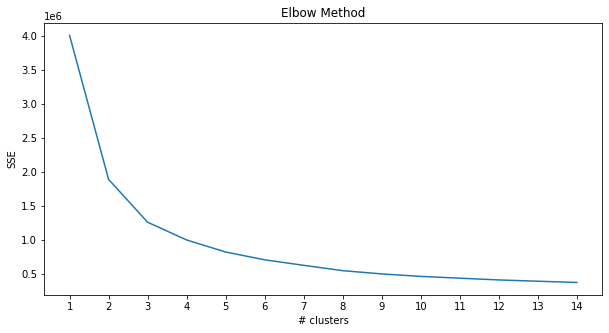

In [112]:
plt.figure(figsize=(10,5))
plt.plot(range(1,15),sse)
plt.xticks(range(1,15))
plt.xlabel('# clusters')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

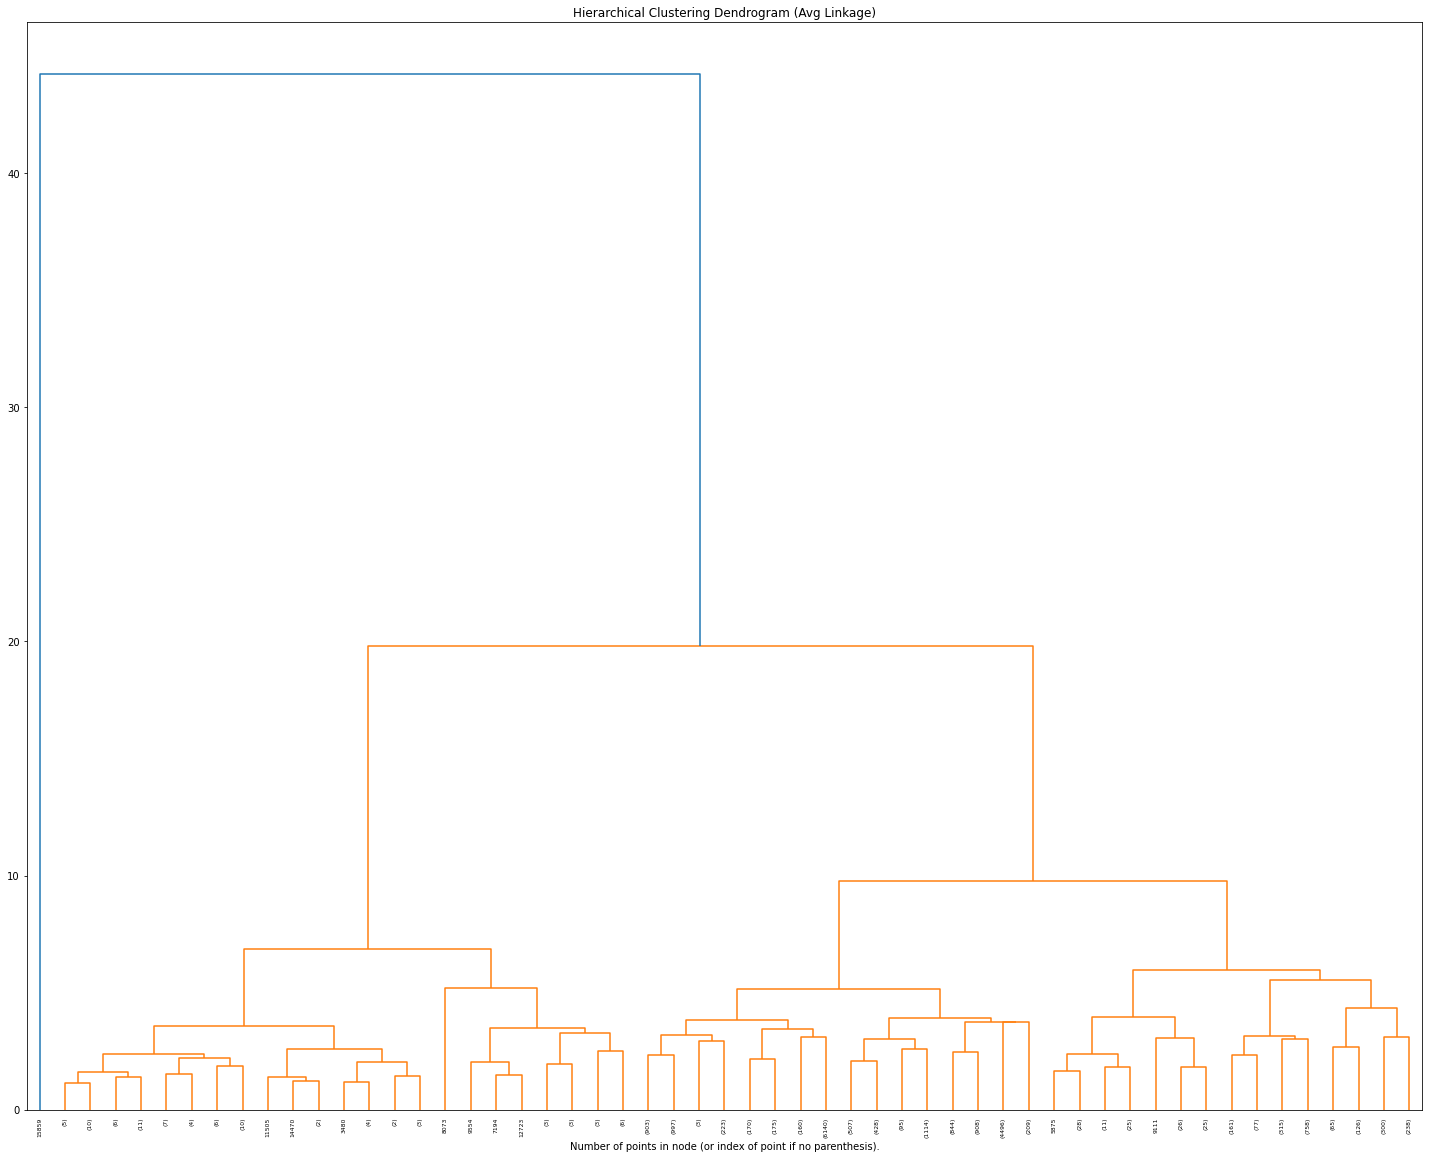

In [113]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.utils import shuffle
from scipy.cluster.hierarchy import dendrogram

tmp = shuffle(X).sample(frac=0.1)
# tmp = X.sample(frac=0.2)

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    
    dendrogram(linkage_matrix, **kwargs)


model = AgglomerativeClustering(distance_threshold =0, n_clusters=None, compute_distances=True,linkage='average').fit(tmp)

plt.figure(figsize=(25,20))
plt.title("Hierarchical Clustering Dendrogram (Avg Linkage)")
plot_dendrogram(model, truncate_mode="level", p=6)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [114]:
# From above we can see that we can go with 3 clusters

In [115]:
from sklearn.cluster import KMeans

k = 3
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)
labels = kmeans.labels_

In [116]:
pd.Series(labels).value_counts()

0    103659
2     75370
1     17196
dtype: int64

In [117]:
clusters = pd.DataFrame(X, columns=['ctc','experience','company_rel_class','job_position_rel_class','yoe_rel_class','company_hash_encode','job_position_encode'])
clusters['kmeans'] = labels

In [118]:
### GMM

In [119]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3).fit(X)

In [120]:
clusters = pd.DataFrame(X, columns=df.columns)
clusters['label'] = gmm.predict(X)

In [121]:
clusters['label'].value_counts()

1    149260
0     36084
2     10881
Name: label, dtype: int64

### Insights:

<ul>
    <li> Top Paying job titles include 'Engineering Leadership',
 'Backend Engineer',
 'Product Manager',
 'Program Manager',
 'SDET',
 'QA Engineer',
 'Data Scientist',
 'Android Engineer' and
 'FullStack Engineer'.
  <li> Top paying companies include 'Cisco',
 'Intel Technology India Pvt Ltd',
 'Amazon',
 'Walmart Labs',
 'Symantec',
 'Schneider Electric India',
 'Morgan Stanley',
 'Ericsson RD Bangalore' and
 'Samsung Electronics'.
  <li>  Among top paying companies, salary for these is getting lesser in recent years, Goldmaan Sachs, Tata Consultancy Services, Samsung Electronics, VMware, Dell, Dbs Bank, Hsbc software devlopement India and GE
      <li> Among Top paying companies mean salary for these company is increasing every year, Amazon,Microsoft and Huawei Technologies
          <li> Avg CTC seems to be decreasing with year.

 </ul>

### Recommendations

<ul>
<li> Freshers who want to work on technical side should look for roles related to Backend Engineer, SDET, QA engineer, Dataa Scientist, Android Engineer,Full stack engineer to get good salaries as expirience increases.
<li> Freshers who want best CTC should aim for companies like 'Cisco', 'Intel Technology India Pvt Ltd', 'Amazon', 'Walmart Labs', 'Symantec', 'Schneider Electric India', 'Morgan Stanley', 'Ericsson RD Bangalore' and 'Samsung Electronics'. 
</ul>
